# Goals

This is where the actual data analysis happens. "VizualizeData.ipynb" is where I actually go about parsing the data which I then put into usable data files so I don't need to re-parse each time.

In [1]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits

### Load data

In [2]:
### Load data from my data files ###

## C20 phot data:
c20p = np.load("Data/Hyperion_C20_phot.npy", allow_pickle=True)

## C20 spec data:
c20s = np.loadtxt("Data/Hyperion_C20_spec.txt", dtype=str)

# Fix up the formatting for the spec data-file:
new_array = []
for idx in range(c20s.shape[1]):
    try:
        col = c20s[:,idx].astype(np.float32)
    except:
        col = c20s[:,idx]
    new_array.append(col)

c20s = np.array(new_array, dtype=object)
c20s = np.transpose(c20s)

### Overdensities

In [3]:
### Make a plot of overdensities of galaxies:

# Combine phot and spec data into (ra,dec,z,stellarmass,overdensity, spec?)
temp_list = []
for p in c20p:
    temp_list.append([p["ALPHA_J2000"], p["DELTA_J2000"],p["lp_zPDF"] ,p["lp_mass_med"], p["overdense"], 0])

for s in c20s:
    temp_list.append([s[4], s[6], s[11], s[15], s[-1],1])

temp_list = np.array(temp_list)

In [4]:
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

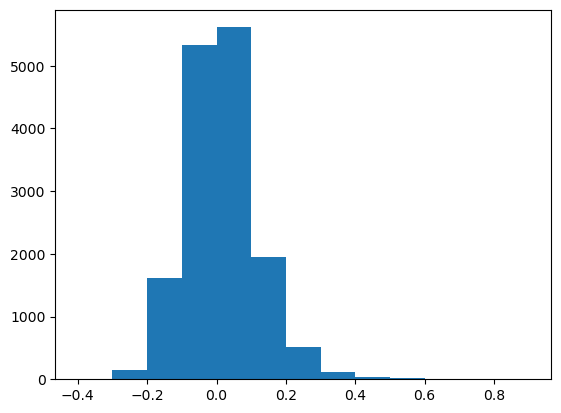

In [5]:
### Histogram of overdensities ###
plt.hist(temp_list[:,-2], bins = np.arange(-0.4,1,0.1))
plt.show()

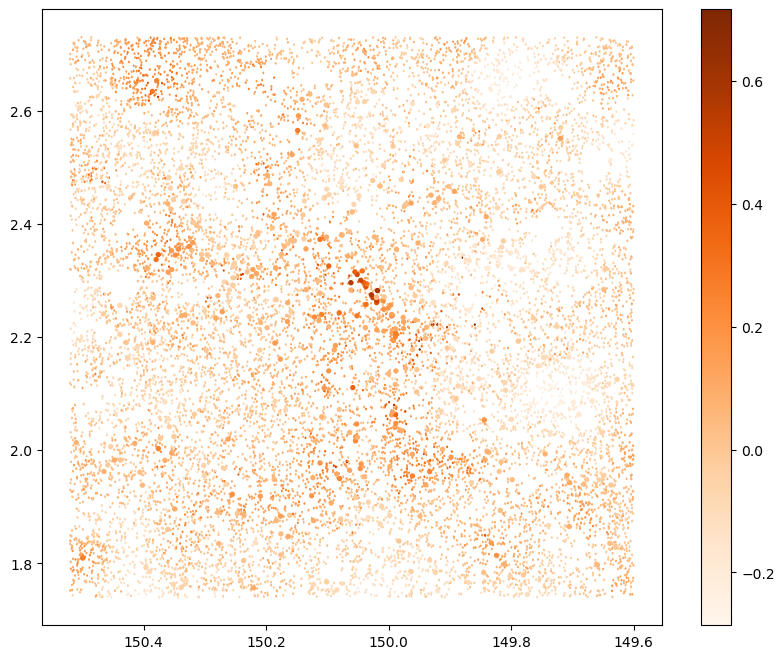

In [6]:
### Sky-projection of overdensity ###

# Get galaxies with valid overdensity
good_idxs = np.where(temp_list[:,-2] != 0)[0]
good_pts = temp_list[good_idxs]
good_shapes = ["o" if i==1 else "d" for i in good_pts[:,-1]]   # marker shape to plot
good_sizes = [8 if i==1 else 0.5 for i in good_pts[:,-1]]   # marker size to plot



bad_idxs = np.where(temp_list[:,-2] == -99)[0]
bad_pts =temp_list[bad_idxs]
bad_shapes = ["o" if i==1 else "d" for i in bad_pts[:,-1]]  # marker shape to plot
bad_sizes = [0.5 if i==1 else 0.2 for i in bad_pts[:,-1]]   # marker size to plot

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

# Plot good points
cs = mscatter(good_pts[:,0], good_pts[:,1], c=good_pts[:,-2], s=good_sizes, m=good_shapes, ax=ax, cmap="Oranges")



fig.colorbar(cs)
plt.gca().invert_xaxis()

plt.show()


In [7]:
def mscatter3d(x,y,z, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,z,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

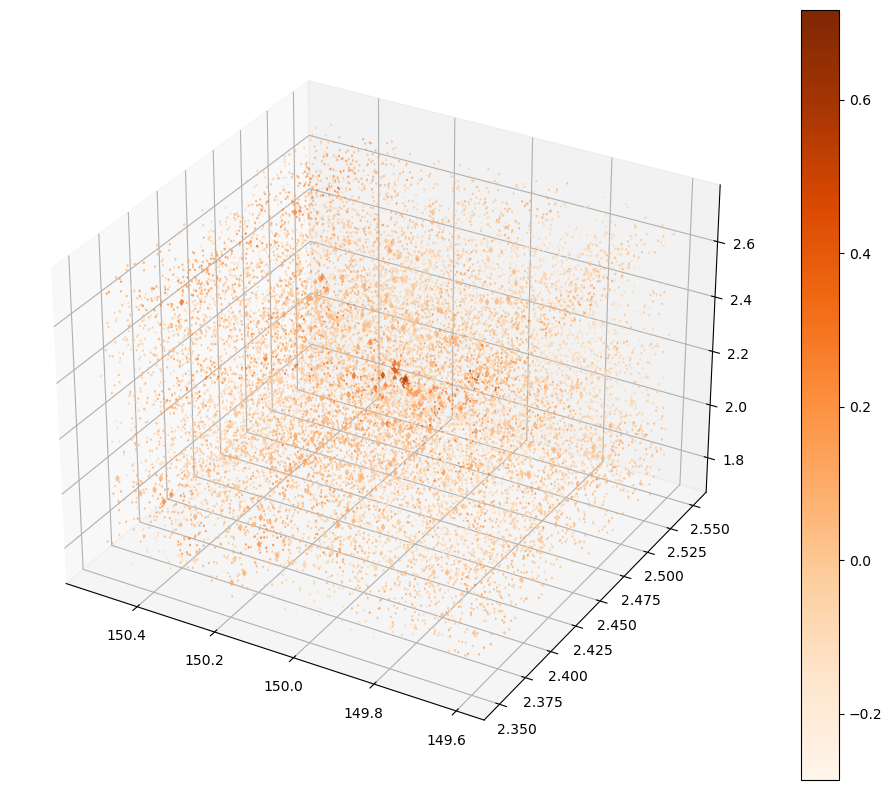

In [8]:
fig = plt.figure()
fig.set_size_inches(12,10)
ax = fig.add_subplot(projection='3d')

c3d = mscatter3d(good_pts[:,0], good_pts[:,2], good_pts[:,1], ax=ax, c=good_pts[:,-2], s=good_sizes, m=good_shapes, cmap='Oranges')
plt.gca().invert_xaxis()

plt.colorbar(c3d)
plt.show()

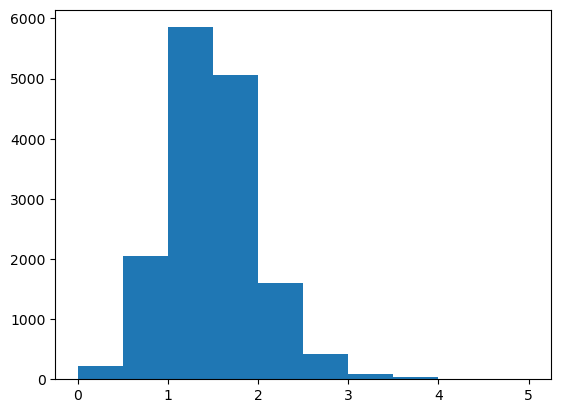

In [9]:
norm_size = 5* (good_pts[:,-2]-np.min(good_pts[:,-2])) / (np.max(good_pts[:,-2]) - np.min(good_pts[:,-2]))
plt.hist(norm_size, bins=10)
plt.show()

0.018911007853740138 153.23748379389357 0.2660560261378832


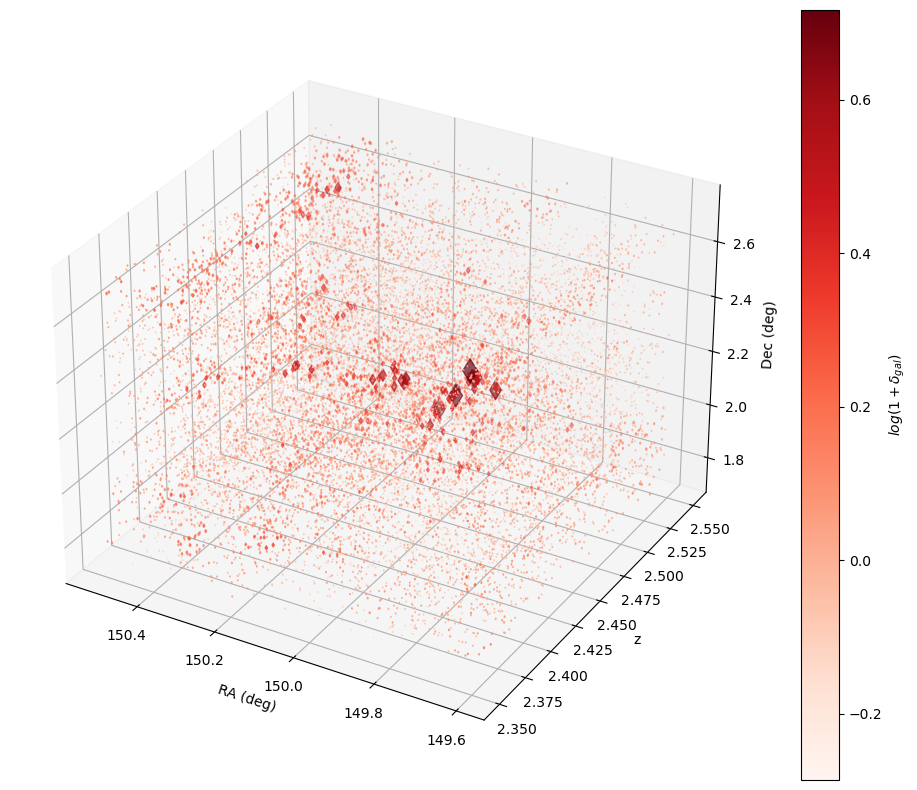

In [16]:
norm_size = 9* (good_pts[:,-2]-np.min(good_pts[:,-2])) / (np.max(good_pts[:,-2]) - np.min(good_pts[:,-2]))
norm_size = np.exp(norm_size) / (20*np.median(norm_size))
print(min(norm_size), max(norm_size), np.median(norm_size))
fig = plt.figure()
fig.set_size_inches(12,10)
ax = fig.add_subplot(projection='3d')
ax.set(xlabel="RA (deg)", zlabel="Dec (deg)", ylabel="z")

c3d = mscatter3d(good_pts[:,0], good_pts[:,2], good_pts[:,1], ax=ax, c=good_pts[:,-2], s=norm_size, m=good_shapes, cmap="Reds")
plt.gca().invert_xaxis()

plt.colorbar(c3d, label=r"$log(1+\delta_{gal})$")
plt.show()

### Stellar Masses

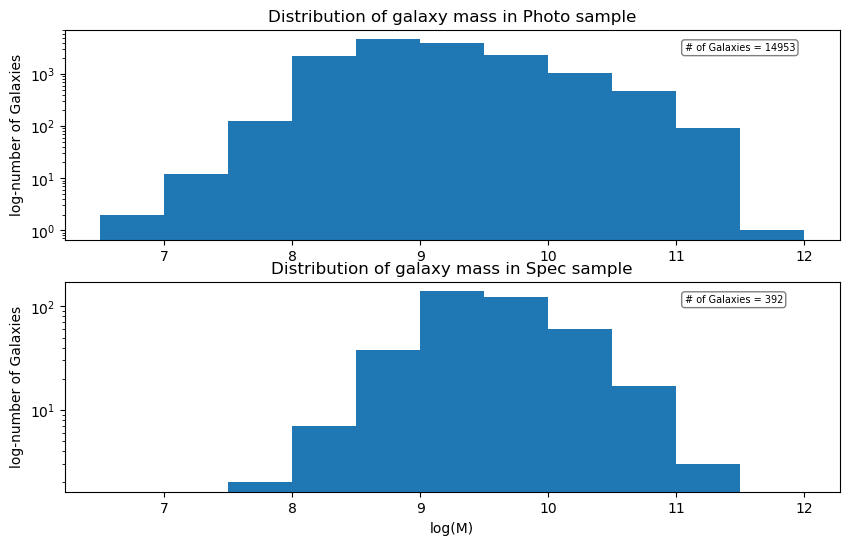

In [11]:
### C20 Phot stellar mass

fig,ax = plt.subplots(2,1)

fig.set_size_inches(10,6)

ax[0].hist(c20p["lp_mass_med"], bins=np.arange(6.5, 12.5, 0.5))
ax[0].set(yscale="log", ylabel="log-number of Galaxies", title="Distribution of galaxy mass in Photo sample")
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[0].text(0.8, 0.9, f"# of Galaxies = {c20p.shape[0]}", fontsize=7,
                    bbox=bbox,transform=ax[0].transAxes)

ax[1].hist(c20s[:,15], bins=np.arange(6.5, 12.5, 0.5))
ax[1].set(yscale="log", ylabel="log-number of Galaxies",xlabel="log(M)", title="Distribution of galaxy mass in Spec sample")
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[1].text(0.8, 0.9, f"# of Galaxies = {c20s.shape[0]}", fontsize=7,
                    bbox=bbox,transform=ax[1].transAxes)

plt.show()